In [91]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [92]:
#importing the dataset
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [93]:
# checking for null values
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [94]:
#chcking descriptive statistics results
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [95]:
# defining function for EDA
def conti_var(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5),tight_layout=True)

    axes[0].set_title('Distribution')
    sns.histplot(x,ax=axes[0])
    axes[0].grid()

    axes[1].set_title('Outliers')
    sns.boxplot(x,ax=axes[1])

    axes[2].set_title('relaation wrt to output variable')
    sns.boxplot(x=data.Potability,y=x)
    axes[2].grid()

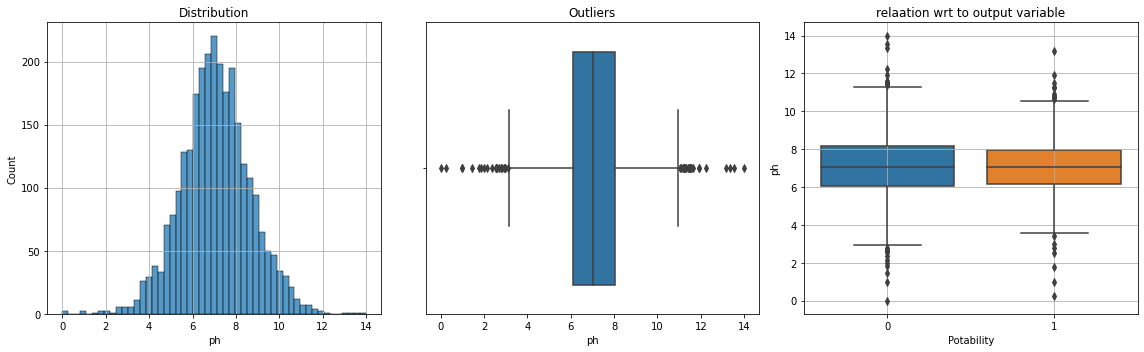

In [96]:
#EDA of Ph variable
conti_var(data.ph)

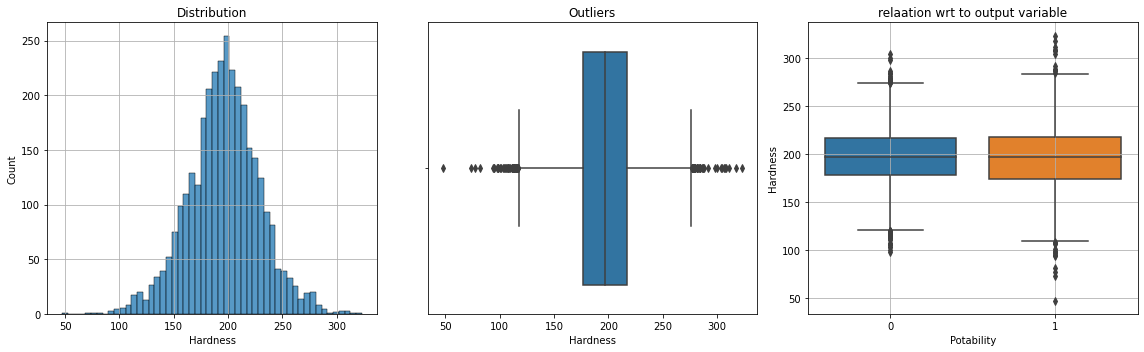

In [97]:
#EDA of Hardness variable
conti_var(data.Hardness)

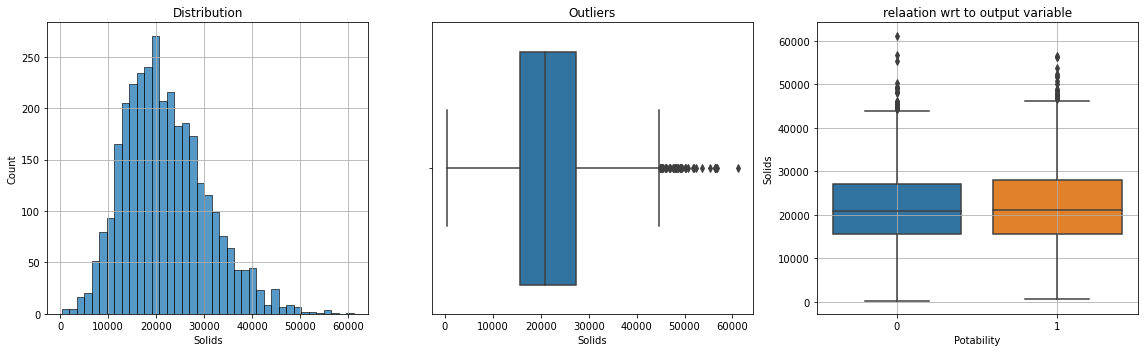

In [98]:
#EDA of solids
conti_var(data.Solids)

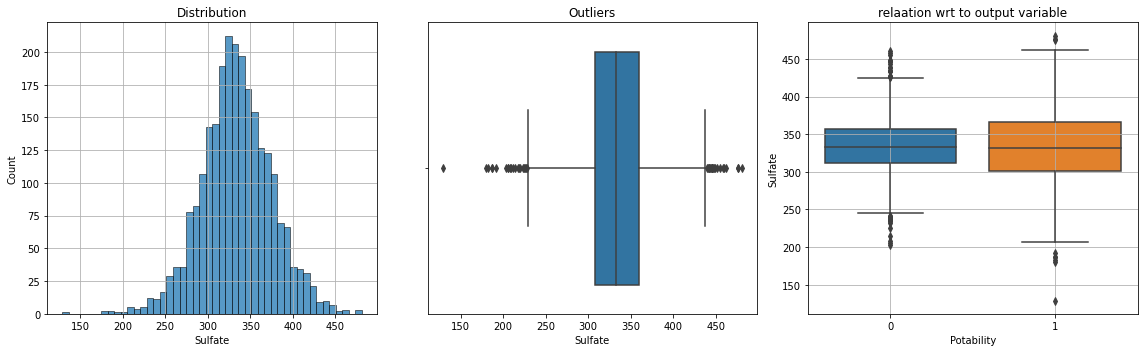

In [99]:
#EDA of sulfates
conti_var(data.Sulfate)

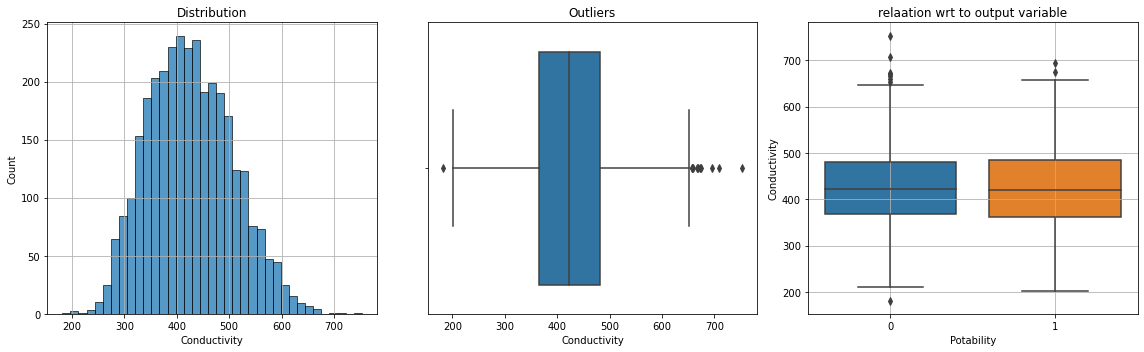

In [100]:
#EDA of Conductivity variable
conti_var(data.Conductivity)

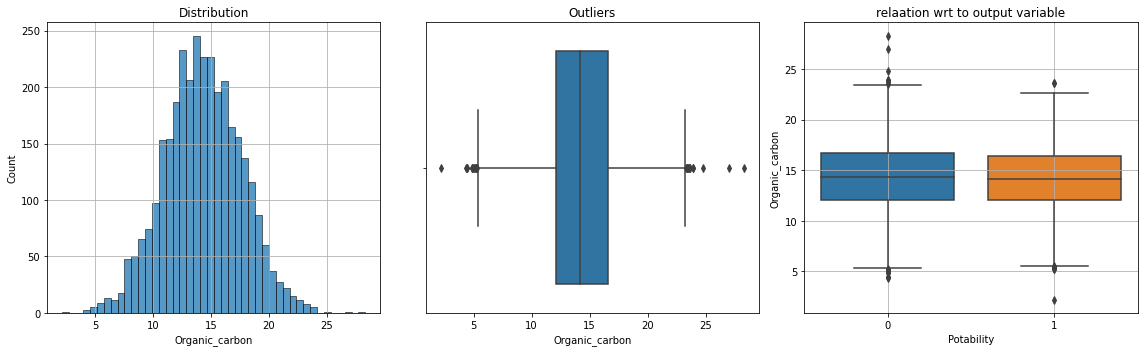

In [101]:
# EDA of Organic_carbon variable
conti_var(data.Organic_carbon)

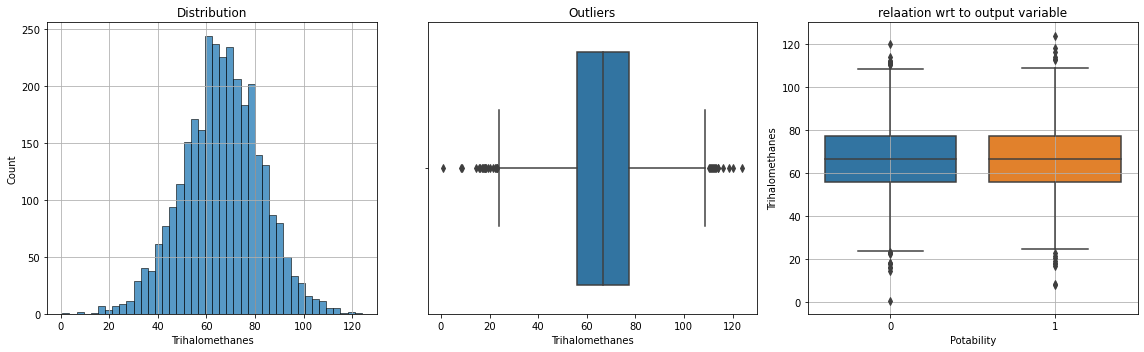

In [102]:
# EDA of Trihalomethanes variable
conti_var(data.Trihalomethanes)

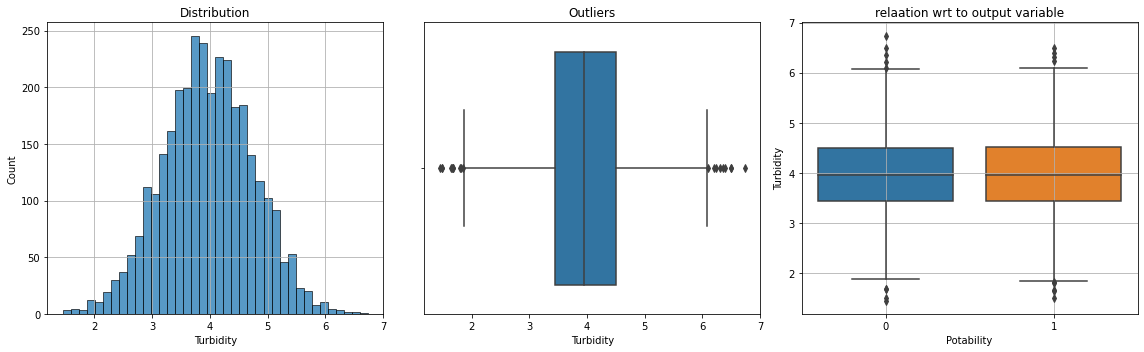

In [103]:
# EDA of Turbidity variable
conti_var(data.Turbidity)

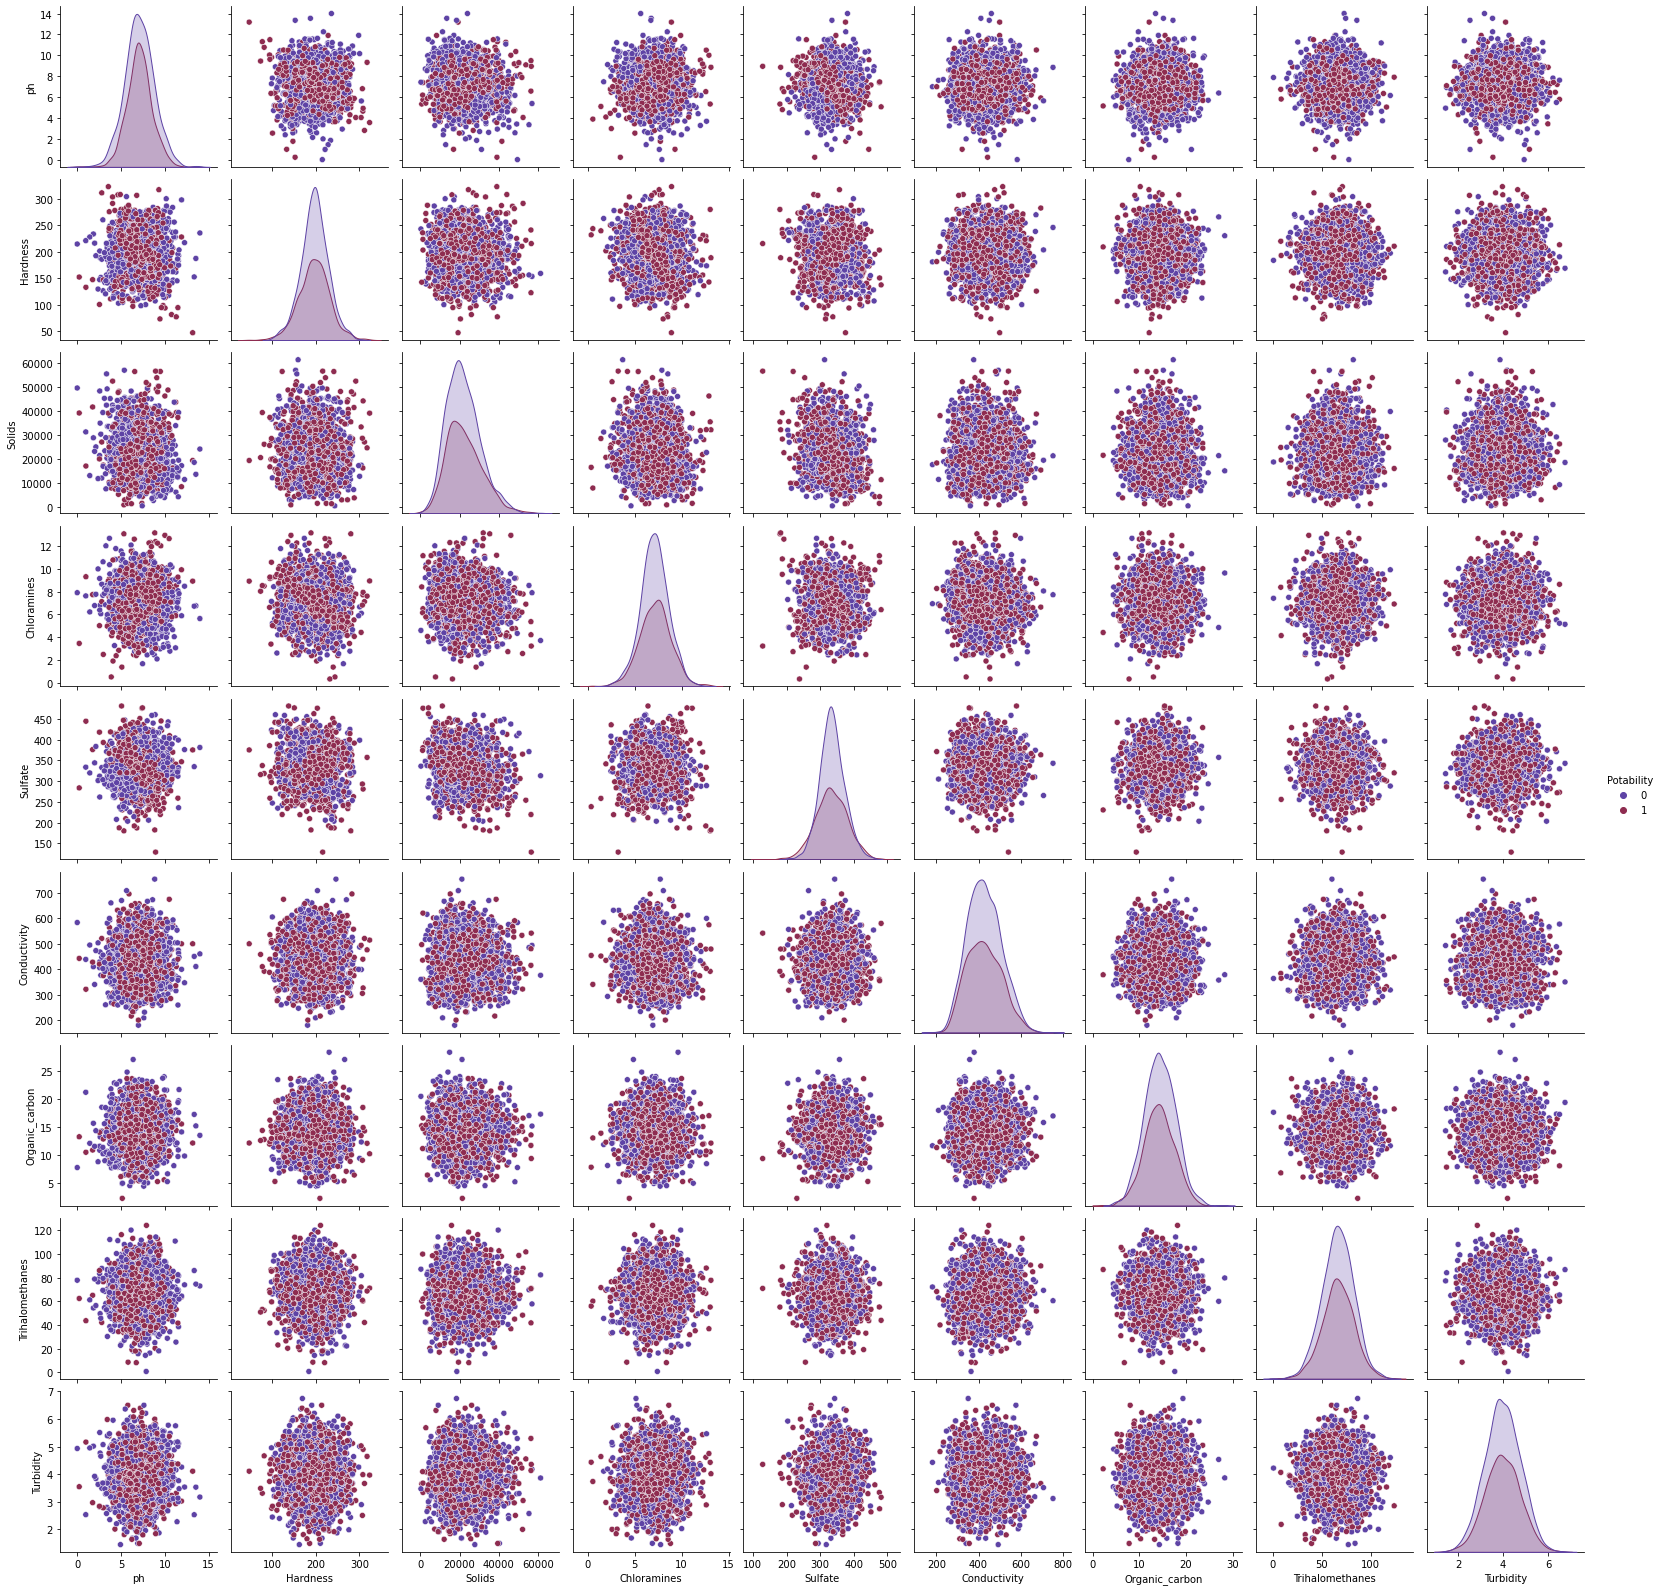

In [104]:
#Pairplot
ax = sns.pairplot(data, hue="Potability",diag_kind="kde",kind="scatter",palette="twilight")
plt.show()

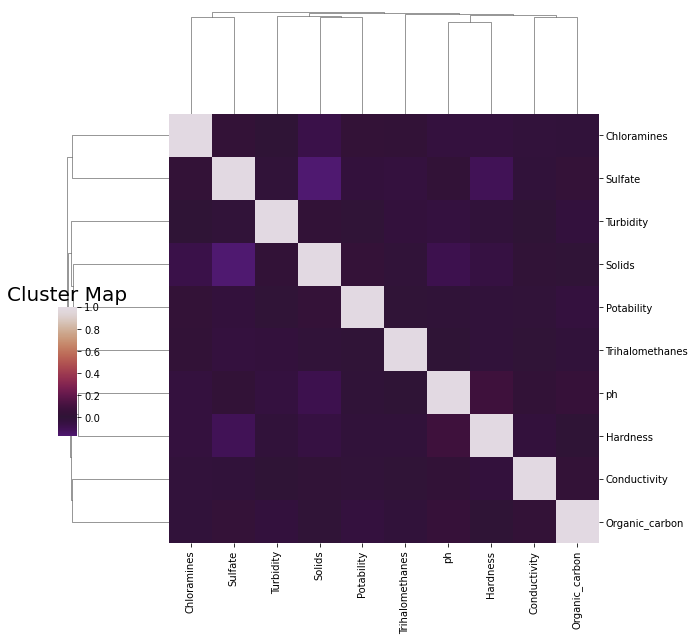

In [105]:
#Cluster Map
g = sns.clustermap(data.corr(), center=0, cmap="twilight",
                   dendrogram_ratio=(.2, .2),
                   cbar_pos=(.01, .32, .03, .2), figsize=(9, 9))
plt.title("Cluster Map", fontsize=20);
plt.show()

In [106]:
#checking output variable for unbalanced dataset
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [107]:
# Since Trihalomethanes and pH has less number of missing values, they are imputed with median value
data.ph.fillna(data.ph.median(),inplace=True)
data.Trihalomethanes.fillna(data.Trihalomethanes.median(),inplace=True)

In [108]:
#splitting the data
test_x = data[data.Sulfate.isna()].drop('Sulfate',axis=1)
train_x = data[data.Sulfate.notna()].drop('Sulfate',axis=1)
train_y = data.Sulfate[data.Sulfate.notna()]

#splitting the shape of splitted data
print('train_x = {}, train_y={}, test_x={}'.format(train_x.shape,train_y.shape,test_x.shape))

train_x = (2495, 9), train_y=(2495,), test_x=(781, 9)


In [109]:
#since sulfate variable has more missing values, they are filled with linear regression algorithm
#importing missing values
from sklearn.linear_model import LinearRegression

#initializing the model
lin = LinearRegression()

#fitting the model
lin.fit(train_x,train_y)

#predicting the missing values
for i in data[data.Sulfate.isna()].index:
    data.Sulfate[i] = lin.predict([data.loc[i,data.columns != 'Sulfate']])

<AxesSubplot:>

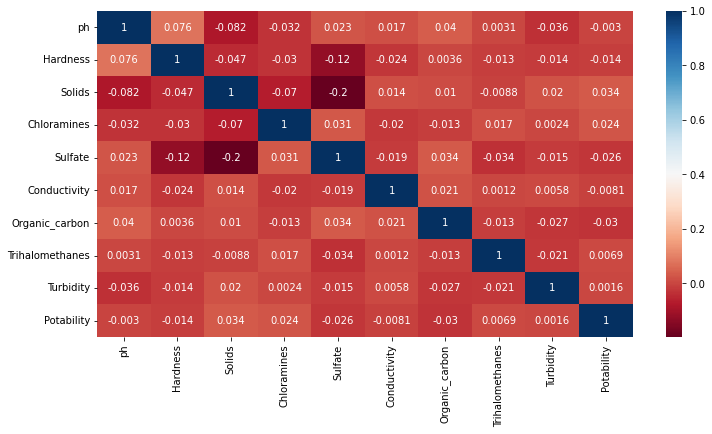

In [110]:
# checking the corealtion
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

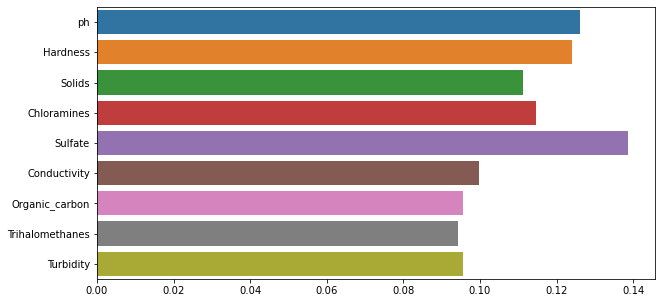

In [111]:
#Feature selection using random forest feature importance
#importing the libraries
from sklearn.ensemble import RandomForestClassifier

#initializing the model
ran = RandomForestClassifier()

#fitting the model
ran.fit(data.drop('Potability',axis=1),data.Potability)

plt.figure(figsize=(10,5))
sns.barplot(x=ran.feature_importances_,y=data.drop('Potability',axis=1).columns)
plt.show()

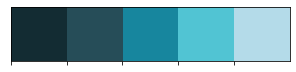

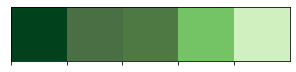

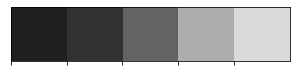

In [112]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

In [116]:
import plotly.express as px
d= pd.DataFrame(data['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_green[3],colors_blue[3]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [117]:
#splitting the data into input and output
x = data.drop(['Potability','Organic_carbon'],axis=1)
y = data.Potability

print('input shape={}, output shape={}'.format(x.shape,y.shape))

input shape=(3276, 8), output shape=(3276,)


In [118]:
#Standard scalar is used to avoid scaling effect
#importing the libraries
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#fitting scalar model for input data
x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

In [119]:
#splitting entire data into 80% train and 20% test
# importing the libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

print('Shape of Splitting:')
print('x_train={},y_train={},x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting:
x_train=(2620, 8),y_train=(2620,),x_test=(656, 8),y_test=(656,)


In [120]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  plot_confusion_matrix,accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

confusion matrix:


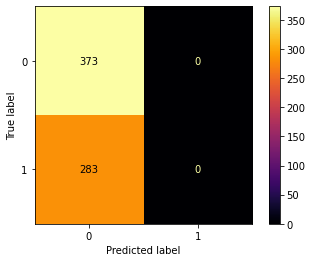

62.02

In [121]:
pred_logreg = logreg.predict(x_test)
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(logreg,x_test,y_test,cmap='inferno')
plt.show()

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

In [122]:
#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)


SVC()

confusion matrix:


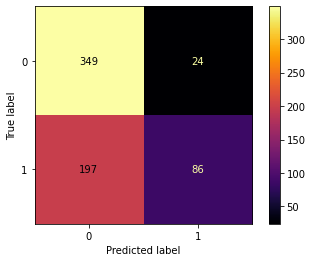

In [123]:
pred_svc= svc.decision_function(x_test)

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(svc,x_test,y_test,cmap='inferno')
plt.show()

In [124]:
#checking hyper parameters
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Fitting 3 folds for each of 15 candidates, totalling 45 fits
confusion matrix:


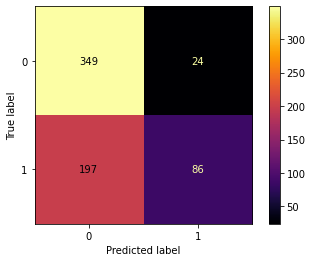

72.56

In [125]:
#hyper parameters
params = {'C':[0.001,0.01,0.1,1,10],
          'kernel':['linear', 'poly', 'rbf']}

#initializing the grid
grid_svc = GridSearchCV(estimator=svc,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_svc = grid_svc.fit(x_train,y_train).predict(x_test)

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_svc,x_test,y_test,cmap='inferno')
plt.show()

#accuracy score
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

confusion matrix:


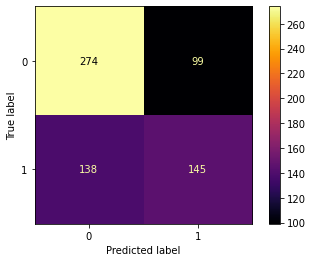

In [126]:
#KNeighbors Classifier
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
#fitting and predicting for test data
pred_knn = knn.fit(x_train,y_train).predict(x_test)

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(knn,x_test,y_test,cmap='inferno')
plt.show()


In [127]:
#checking hyper parameters
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
confusion matrix:


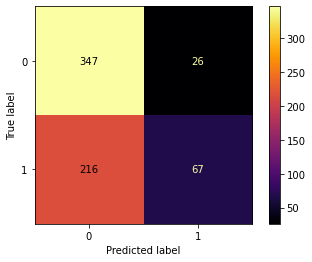

81.03

In [128]:
#hyper parameters
params = {'n_neighbors':range(1,25)}

#initializing the grid
grid_knn = GridSearchCV(estimator=knn,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_knn = grid_knn.fit(x_train,y_train).predict(x_test)


#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_knn,x_test,y_test,cmap='inferno')
plt.show()


#accuracy score
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

confusion matrix:


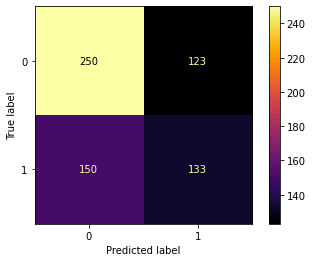

99.62

In [129]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
deci =DecisionTreeClassifier(criterion='entropy', max_depth=42, min_samples_leaf=1, random_state=42)
#fitting and predicting for test data
pred_deci = deci.fit(x_train,y_train).predict(x_test)

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(deci,x_test,y_test,cmap='inferno')
plt.show()


deci.score(x_train, y_train)
acc_decision_tree = round(deci.score(x_train,y_train)*100,2)
acc_decision_tree

In [130]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
#fitting and predicting for test data
random_forest.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

confusion matrix:


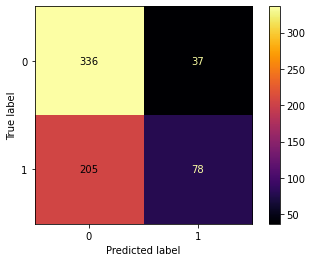

In [131]:
pred_rand=random_forest.predict(x_test)
#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(random_forest,x_test,y_test,cmap='inferno')
plt.show()

In [133]:
#checking for hyper parameters
random_forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Fitting 3 folds for each of 81 candidates, totalling 243 fits
confusion matrix:


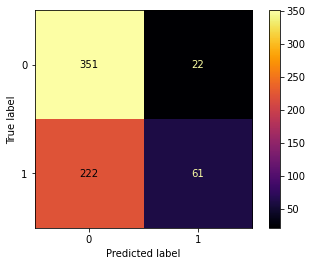

99.77

In [134]:
#hyper parameters
params = {'max_depth':[15,20,25],
          'min_samples_leaf':[10,20,30],
          'min_samples_split':[10,20,30],
          'n_estimators' : [200,250,300]
         }
#initializing the grid
grid_random_forest = GridSearchCV(estimator=random_forest,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_rand = grid_random_forest.fit(x_train,y_train).predict(x_test)

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_random_forest,x_test,y_test,cmap='inferno')
plt.show()

#accuracy score
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

In [135]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.77
4,Decision Tree,99.62
1,KNN,81.03
0,Support Vector Machines,72.56
2,Logistic Regression,62.02


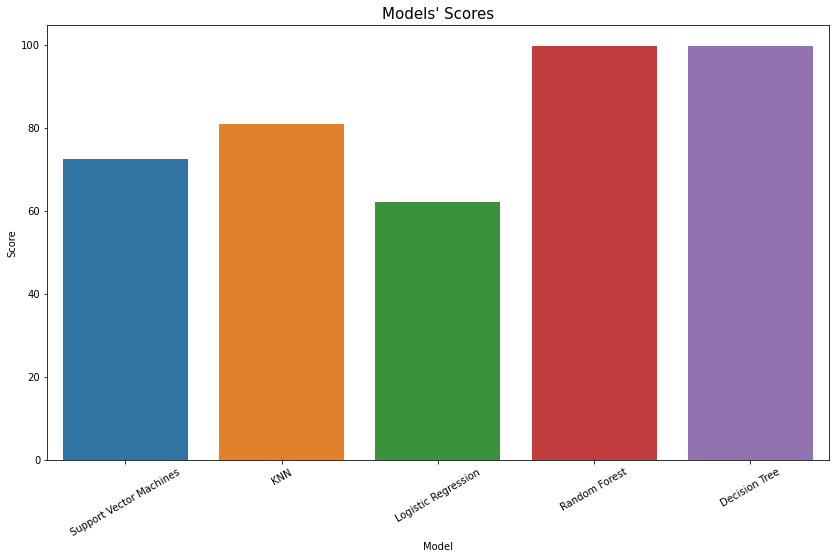

In [136]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["Model"], y=models["Score"])
plt.title("Models' Scores", size=15)
plt.xticks(rotation=30)
plt.show()